# Causal Inference Training Exercises
## Controlled Regression

These exercises are designed to introduce the concept of a controlled regression, highlighting the strengths and the weaknesses. These use simulated data.

First, let us import the data and examine it. We have data at a restaurant level across different zones, with details on the restaurant's performance on the platform, alongside socioeconomic data for the zone. 

The database contains the following variables:

| varname       | description   |
| :------------- |:-------------|
| `rx_id` | Restaurant ID |
| `zone_code` | Zone that the restaurant is in |
| `rx_gmv`    | GMV for the restaurant in the past month |
| `num_rx` | Number of restaurants in the zone on Deliveroo |
| `zone_avg_family_size` | Average number of persons per household in the zone |
| `zone_avg_hh_income`     | Average household income in the zone      | 
| `zone_avg_rx_density` | Density of restaurants in the zone (restaurants per km^2)      |
| `zone_prop_students` | Proportion of the zone's population that is in full time education |
| `account_managers_per_zone` | Number of Deliveroo AMs working with restaurants in the zone |


In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('restaurant_data.csv')

data.head()

,rx_id,zone_code,rx_gmv,num_rx,zone_avg_family_size,zone_avg_hh_income,zone_avg_rx_density,zone_prop_students,account_managers_per_zone
0,1,CHSS,4306.075498,75,4.189727,46585.295467,11.089246,0.284856,38
1,2,ESH,5516.551907,74,3.945059,51704.965802,12.124677,0.145236,38
2,3,HRO,4776.765389,78,3.939056,48468.601160,11.041757,0.253112,39
3,4,CHI,5231.623158,77,3.784492,50343.213707,9.905140,0.247654,38
4,5,CLH,4439.720352,65,4.100139,43612.853883,9.055209,0.090492,32


## Part 1
Let's imagine the hypothesis of interest is the relationship between restaurant performance on Deliveroo and how many restaurants there are in a given zone. We would imagine that having more restaurants on Deliveroo is bad for each individual restaurant's performance as they face more competition (if all else was equal).

1. Perform a linear regression of `rx_gmv` on `num_rx` with a constant. What is the coefficient estimate?
1. What does this coefficient tell us about the relationship between these two variables? What does it tell us about the causal relationship?
1. Plot the residuals of the regression against `zone_avg_hh_income`. What does this tell us about the likelihood of having omitted variables?



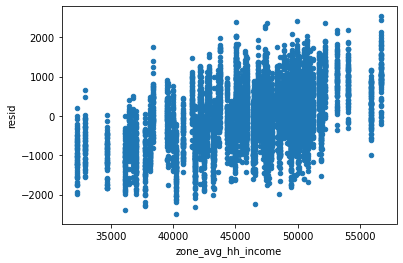

In [14]:
# Create a constant
data['const'] = 1

# Run the regression 
reg = sm.OLS(endog=data['rx_gmv'],
             exog=data[['const', 'num_rx']])
results = reg.fit()

results.summary()

# Get the residuals
data['resid'] = results.resid

# Plot the data
data.plot(x = 'zone_avg_hh_income', y = 'resid', kind = 'scatter')


# 1. coefficient estimate is 68.88
# 2. This tells us there is a positive relationship, and that an increase of 1 restaurant is associated with a 68.88 increase in GMV
# 3. The residuals are positively correlated with zone_avg_hh_income. This means this variable is likely a confounding variable (explanation here https://statisticsbyjim.com/regression/confounding-variables-bias/)

## Part 2
We are interested in further refining our estimates to better understand the causal relationship. 
1. Which of the variables available in the dataset should we control by?
1. Perform the regression with the controls you have identified, what is the new coefficient for the relationship between `rx_gmv` and `num_rx_per_zone`?
1. What does this new coefficient tell us about the relationship between these variables?
1. What are other pieces of data would be useful controls if they were available?

In [19]:
# Create a constant
data['const'] = 1

# Run the regression 
reg = sm.OLS(endog=data['rx_gmv'],
             exog=data[['const', 'num_rx', 'zone_avg_rx_density']]) # why can this not be zone_avg_hh_income? is it because the control must be related to num_rx?
results = reg.fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rx_gmv   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     1354.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:42:32   Log-Likelihood:                -54918.
No. Observations:                6842   AIC:                         1.098e+05
Df Residuals:                    6839   BIC:                         1.099e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 619.4719    112.466      5.508      0.000     399.004     839.940
num_rx                 57.9002      1.582     36.607      0.000      54.800      61.001
zone_avg_rx_density   153.4008     10.941     14.021      0.000     131.953     174.849
==============================================================================
Omnibus:                        4.436   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.167
Skew:                          -0.024   Prob(JB):                        0.125
Kurtosis:                       2.889   Cond. No.                         907.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part 3
One of your colleagues recommends including `account_managers_per_zone` as a control, to account for the differences in Deliveroo support provided between the different zones. 

1. Perform the regression including this additional control. How significant is the coefficient? What has happened to the coefficient on `num_rx_per_zone`?
1. Should you include this variable in your regression? Why/why not?

In [22]:
data['const'] = 1

reg = sm.OLS(endog=data['rx_gmv'],
            exog=data[['const', 'num_rx', 'account_managers_per_zone', 'zone_avg_rx_density']])
results = reg.fit()
results.summary()

# 1. The coefficient is not statistically significant (p-value 0.378). The coefficient on num_rx has a higher standard error
# 2. You should not, because it increases the standard error of the main dependent variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rx_gmv   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     903.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:05:01   Log-Likelihood:                -54918.
No. Observations:                6842   AIC:                         1.098e+05
Df Residuals:                    6838   BIC:                         1.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       627.7691    112.861      5.562      0.000     406.527     849.011
num_rx                       61.8607      4.762     12.990      0.000      52.526      71.196
account_managers_per_zone    -7.9883      9.060     -0.882      0.378     -25.748       9.772
zone_avg_rx_density         153.5883     10.943     14.035      0.000     132.136     175.040
==============================================================================
Omnibus:                        4.305   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.053
Skew:                          -0.024   Prob(JB):                        0.132
Kurtosis:                       2.890   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part 4 (Extension)
You suspect that there could be a non-linear relationship between `rx_gmv` and `num_rx`.
1. How can you test for the presence of a quadratic relationship between the two variables? 
2. What does this test indicate?


In [26]:
data['num_rx_sq'] = data['num_rx'] * data['num_rx']

reg4 = sm.OLS(endog=data['rx_gmv'],
              exog=data[['const', 'num_rx', 'num_rx_sq']])

results = reg4.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rx_gmv   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     1282.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:22:01   Log-Likelihood:                -54971.
No. Observations:                6842   AIC:                         1.099e+05
Df Residuals:                    6839   BIC:                         1.100e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6639.8302    855.915     -7.758      0.0